In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import string

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')
# df=pd.read_csv('/content/drive/MyDrive/train.csv')
# df1=pd.read_csv('/content/drive/MyDrive/test.csv')
# df.head()

In [3]:
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_csv('/content/drive/MyDrive/Train Data.csv')
df1=pd.read_csv('/content/drive/MyDrive/Test Data.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,7531,Contact Center Representatives,"US, VA, Virginia Beach",NaN,NaN,Tidewater Finance Co. was established in 1992 ...,"Tidewater Finance Company, located in Virginia...",The position requires the following qualificat...,Our company offers a competitive salary plus B...,0,1,0,Full-time,Entry level,Unspecified,Financial Services,Customer Service,0
1,130,Customer Service Associate,"US, TX, Dallas",NaN,NaN,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,QualificationsMinimum of 1 year customer servi...,NaN,0,1,0,Full-time,Entry level,High School or equivalent,Telecommunications,Customer Service,0
2,4641,Automated Test Analyst,"NZ, , Auckland",Permanent,NaN,SilverStripe CMS &amp; Framework is an open so...,We are looking for a dedicated and passionate ...,NaN,NaN,0,1,1,Full-time,Mid-Senior level,NaN,Information Technology and Services,NaN,0
3,403,Inside Sales Professional-Omaha,"US, NE, Omaha",NaN,NaN,"ABC Supply Co., Inc. is the nation’s largest w...","As a Sales Representative, you will provide as...","As a Sales Representative, you must have the a...",Your benefits package as a Sales Representativ...,0,1,0,Full-time,NaN,NaN,Building Materials,Sales,0
4,13219,Content Marketing/SEO Manager,"US, CA, Los Angeles",Marketing,NaN,MeUndies is a lifestyle brand that is transfor...,MeUndies is a lifestyle brand that is transfor...,REQUIREMENTS/QUALIFICATIONS/PERSONAL ATTRIBUTE...,"WHY MEUNDIES?We're a fast-growing, VC-backed c...",0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Marketing,0


In [4]:
print(df.shape)
print(df1.shape)

(14304, 18)
(3576, 17)


In [5]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,14304.000000,14304.000000,14304.000000,14304.000000,14304.000000
mean,8929.775098,0.041597,0.792995,0.492939,0.048448
std,5175.090260,0.199673,0.405173,0.499968,0.214718
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4438.750000,0.000000,1.000000,0.000000,0.000000
50%,8905.500000,0.000000,1.000000,0.000000,0.000000
75%,13430.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
print(df.info())
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14304 entries, 0 to 14303
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               14304 non-null  int64 
 1   title                14304 non-null  object
 2   location             14024 non-null  object
 3   department           5029 non-null   object
 4   salary_range         2283 non-null   object
 5   company_profile      11632 non-null  object
 6   description          14303 non-null  object
 7   requirements         12172 non-null  object
 8   benefits             8501 non-null   object
 9   telecommuting        14304 non-null  int64 
 10  has_company_logo     14304 non-null  int64 
 11  has_questions        14304 non-null  int64 
 12  employment_type      11547 non-null  object
 13  required_experience  8629 non-null   object
 14  required_education   7805 non-null   object
 15  industry             10378 non-null  object
 16  func

In [7]:
df.describe(include='object')

,title,location,department,salary_range,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function
count,14304,14024,5029,2283,11632,14303,12172,8501,11547,8629,7805,10378,9135
unique,9288,2751,1163,771,1596,12027,9766,5136,5,7,13,129,37
top,English Teacher Abroad,"GB, LND, London",Sales,0-0,We help teachers get safe &amp; secure jobs ab...,"Play with kids, get paid for it Love travel? J...",University degree required. TEFL / TESOL / CEL...,See job description,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology
freq,262,579,433,115,599,308,336,599,9306,3011,4116,1395,1396


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
print ("Unique values detected in entire data set: \n")
print(df.nunique())
print(df1.nunique())

Unique values detected in entire data set: 

job_id                 14304
title                   9288
location                2751
department              1163
salary_range             771
company_profile         1596
description            12027
requirements            9766
benefits                5136
telecommuting              2
has_company_logo           2
has_questions              2
employment_type            5
required_experience        7
required_education        13
industry                 129
function                  37
fraudulent                 2
dtype: int64
job_id                 3576
title                  2777
location               1176
department              475
salary_range            302
company_profile         899
description            3278
requirements           2645
benefits               1653
telecommuting             2
has_company_logo          2
has_questions             2
employment_type           5
required_experience       7
required_education       13


In [10]:
print ("Null values detected in entire data set: \n")
print(df.isnull().sum())
print(df1.isnull().sum())

Null values detected in entire data set: 

job_id                     0
title                      0
location                 280
department              9275
salary_range           12021
company_profile         2672
description                1
requirements            2132
benefits                5803
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         2757
required_experience     5675
required_education      6499
industry                3926
function                5169
fraudulent                 0
dtype: int64
job_id                    0
title                     0
location                 66
department             2272
salary_range           2991
company_profile         636
description               0
requirements            564
benefits               1409
telecommuting             0
has_company_logo          0
has_questions             0
employment_type         714
required_experience    1375
required_education     1606
in

In [11]:
print ("Precentage wise Null values detected in entire data set: \n")
print(round(100*(df.isnull().sum()/len(df.index)),2))
print(round(100*(df1.isnull().sum()/len(df1.index)),2))

Precentage wise Null values detected in entire data set: 

job_id                  0.00
title                   0.00
location                1.96
department             64.84
salary_range           84.04
company_profile        18.68
description             0.01
requirements           14.90
benefits               40.57
telecommuting           0.00
has_company_logo        0.00
has_questions           0.00
employment_type        19.27
required_experience    39.67
required_education     45.43
industry               27.45
function               36.14
fraudulent              0.00
dtype: float64
job_id                  0.00
title                   0.00
location                1.85
department             63.53
salary_range           83.64
company_profile        17.79
description             0.00
requirements           15.77
benefits               39.40
telecommuting           0.00
has_company_logo        0.00
has_questions           0.00
employment_type        19.97
required_experience    38.4

In [12]:
## The column "salary range" is  84% null
## It doesn't look like this is usefull for our model,so we drop this column

df = df.drop('salary_range', axis=1)

In [13]:
# The columns in this data set are mostly categorical, and have a lot of missing values in some of the columns. Because of that we need to decide how to handle the missing values.We are going to replace the missing values depending on the type of data stored in the column.
df['location'] = df['location'].fillna(value='Other')

df['department'] = df['department'].fillna(value='Other')
df['company_profile'] = df['company_profile'].fillna(value='')

df['description'] = df['description'].fillna(value='')
df['requirements'] = df['requirements'].fillna(value='')


df['benefits'] = df['benefits'].fillna(value='')
df['employment_type'] = df['employment_type'].fillna(value='Other')

df['required_experience'] = df['required_experience'].fillna(value='Not Applicable')
df['required_education'] = df['required_education'].fillna(value='Unspecified')

df['industry'] = df['industry'].fillna(value='Other')
df['function'] = df['function'].fillna(value='Other')

# Missing values are all replaced
print(df.isnull().sum())

# The columns in this data set are mostly categorical, and have a lot of missing values in some of the columns. Because of that we need to decide how to handle the missing values.We are going to replace the missing values depending on the type of data stored in the column.
df1['location'] = df1['location'].fillna(value='Other')

df1['department'] = df1['department'].fillna(value='Other')
df1['company_profile'] = df1['company_profile'].fillna(value='')

df1['description'] = df1['description'].fillna(value='')
df1['requirements'] = df1['requirements'].fillna(value='')


df1['benefits'] = df1['benefits'].fillna(value='')
df1['employment_type'] = df1['employment_type'].fillna(value='Other')

df1['required_experience'] = df1['required_experience'].fillna(value='Not Applicable')
df1['required_education'] = df1['required_education'].fillna(value='Unspecified')

df1['industry'] = df1['industry'].fillna(value='Other')
df1['function'] = df1['function'].fillna(value='Other')

# Missing values are all replaced
print(df1.isnull().sum())

job_id                 0
title                  0
location               0
department             0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64
job_id                    0
title                     0
location                  0
department                0
salary_range           2991
company_profile           0
description               0
requirements              0
benefits                  0
telecommuting             0
has_company_logo          0
has_questions             0
employment_type           0
required_experience       0
required_education        0
industry                  0
function                  0
dtype: int64


Visualizing the datasets...



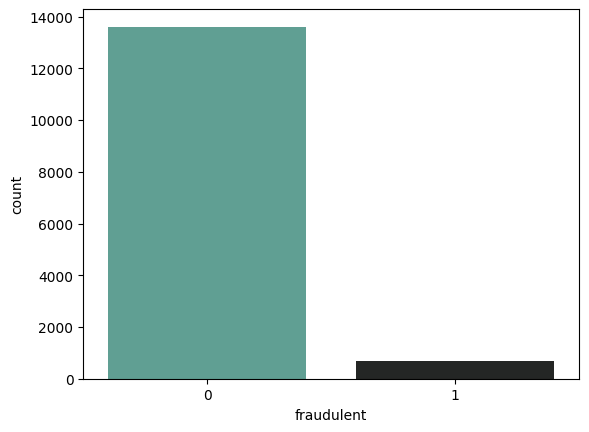

In [14]:
# It would be helpful to know whether there are any correlations between the specific categorical attributes and higher instances of fraud; which we can more easily tell through data visualization

#checking the counts of fraudulent and non-fraudulent jobs
sns.countplot(x='fraudulent',data=df,palette='dark:#5A9_r')
plt.show()

In [15]:
print('No of Fraudlents :- ')
df['fraudulent'].value_counts()

No of Fraudlents :- 


,count
fraudulent,
0,13611
1,693


In [16]:
#Visualize Job postings by countries

def split(location):
  l =location.split(',')
  return l[0]

df['country'] =df.location.apply(split)

df['country'].value_counts()[:11]


,count
country,
US,8520
GB,1895
GR,754
CA,377
DE,305
Other,280
NZ,269
IN,219
AU,171


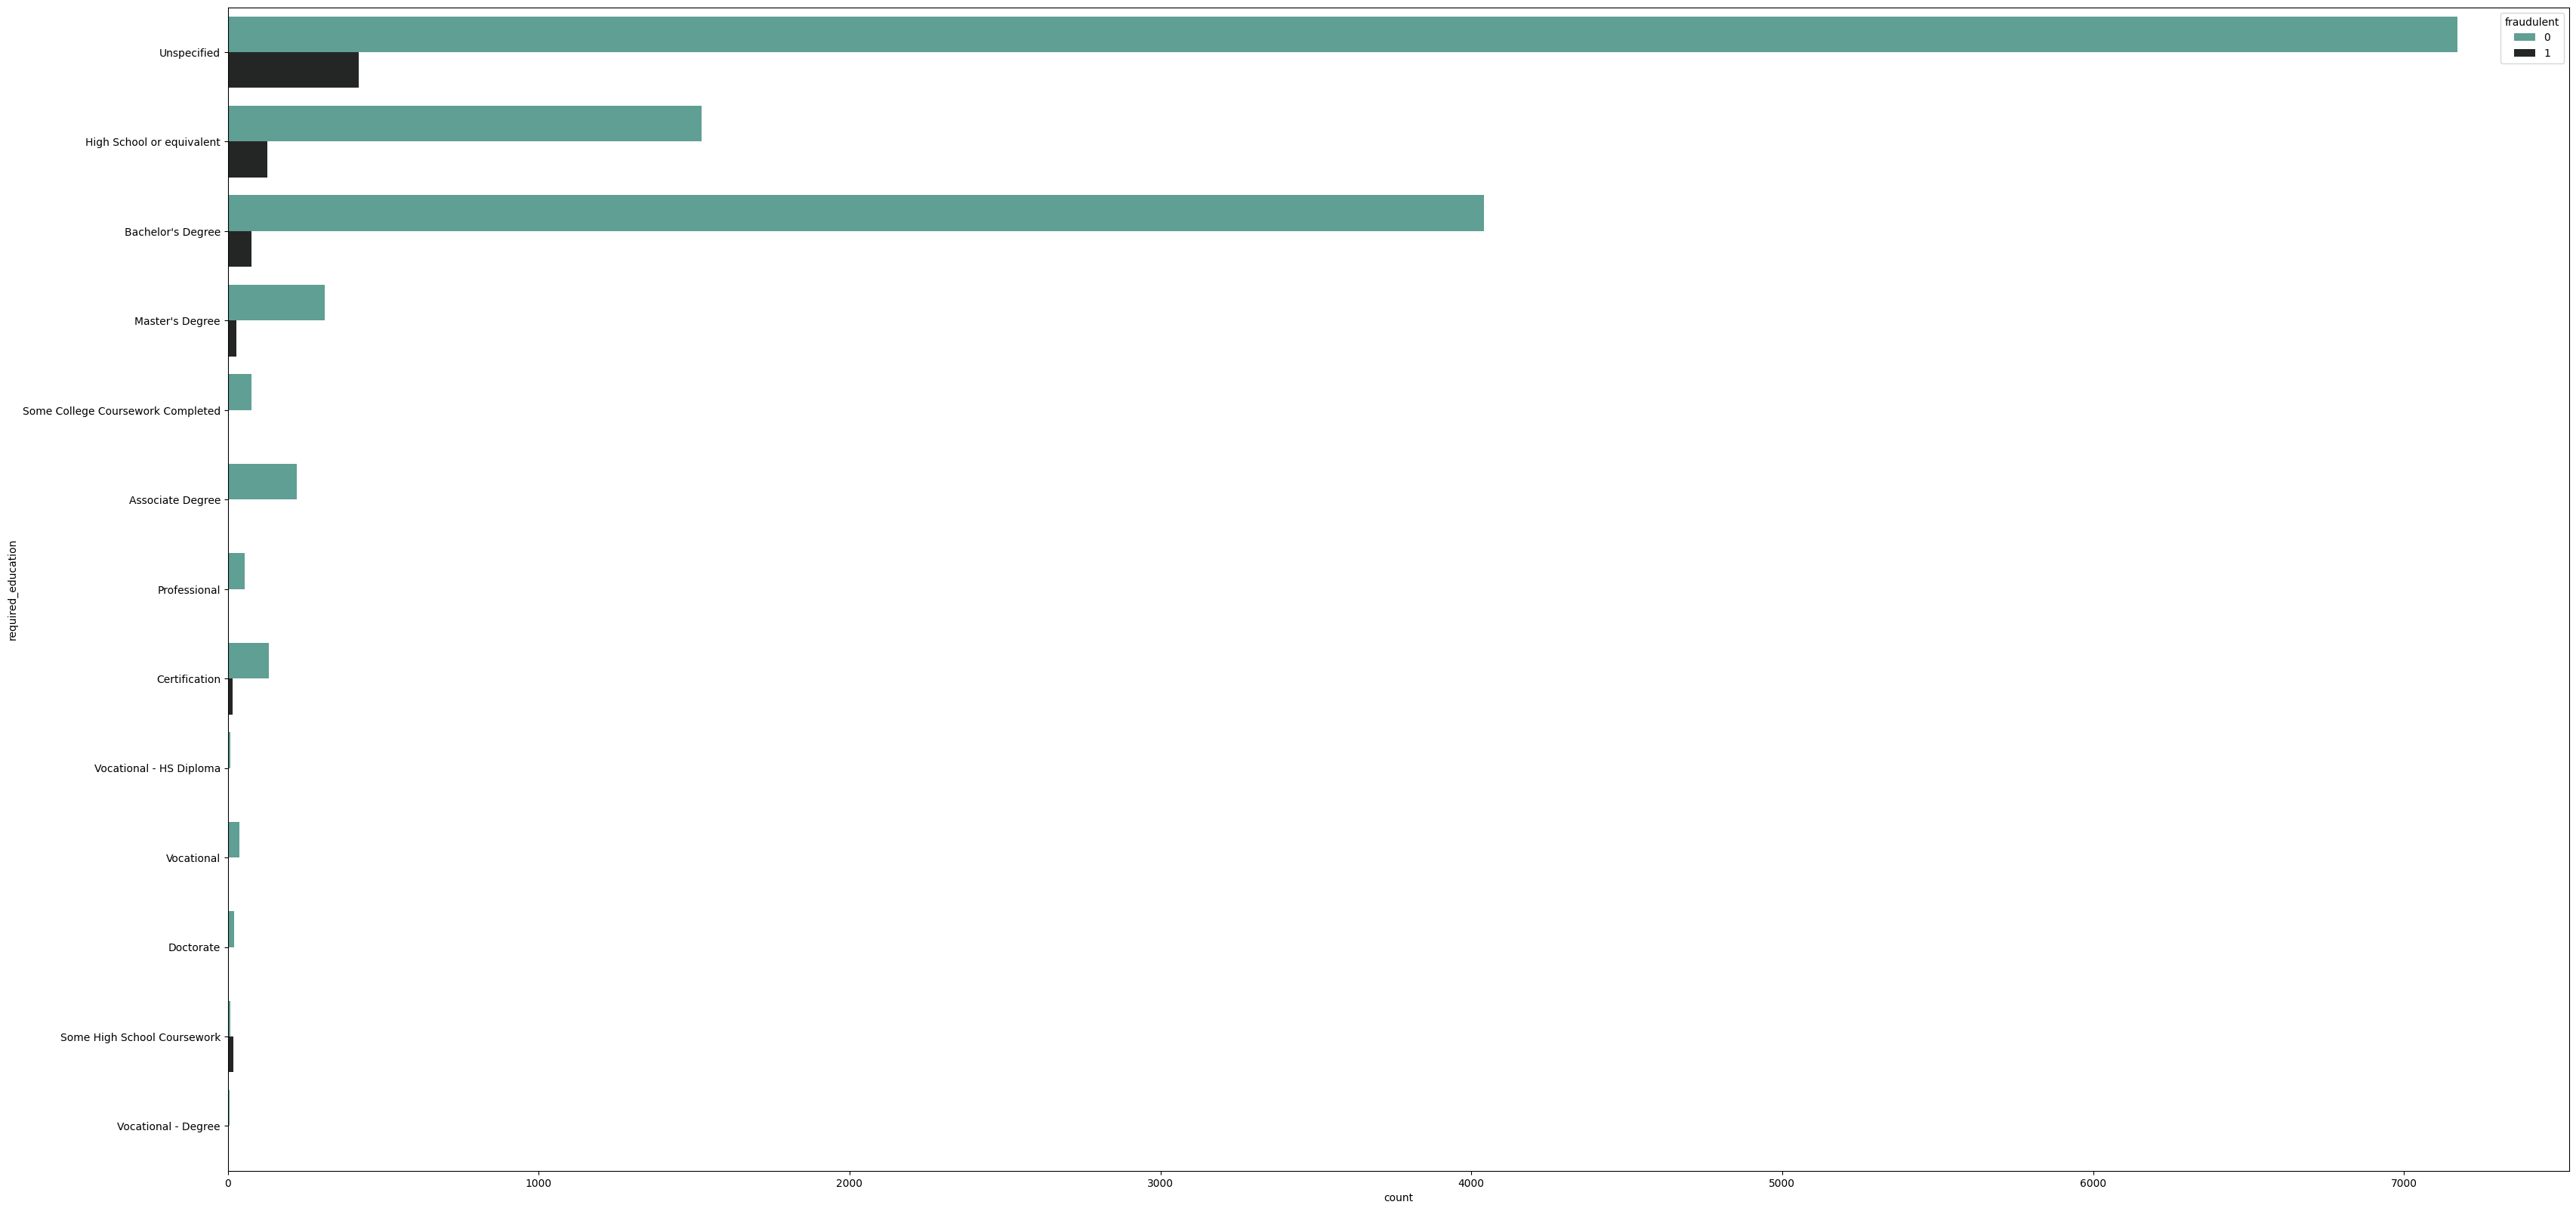

In [17]:
#Plotting incidents of fraudulent postings by the level of education required...

plt.figure(figsize=(40,20))
sns.countplot(palette='dark:#5A9_r', hue='fraudulent', y='required_education',data=df)
plt.show()


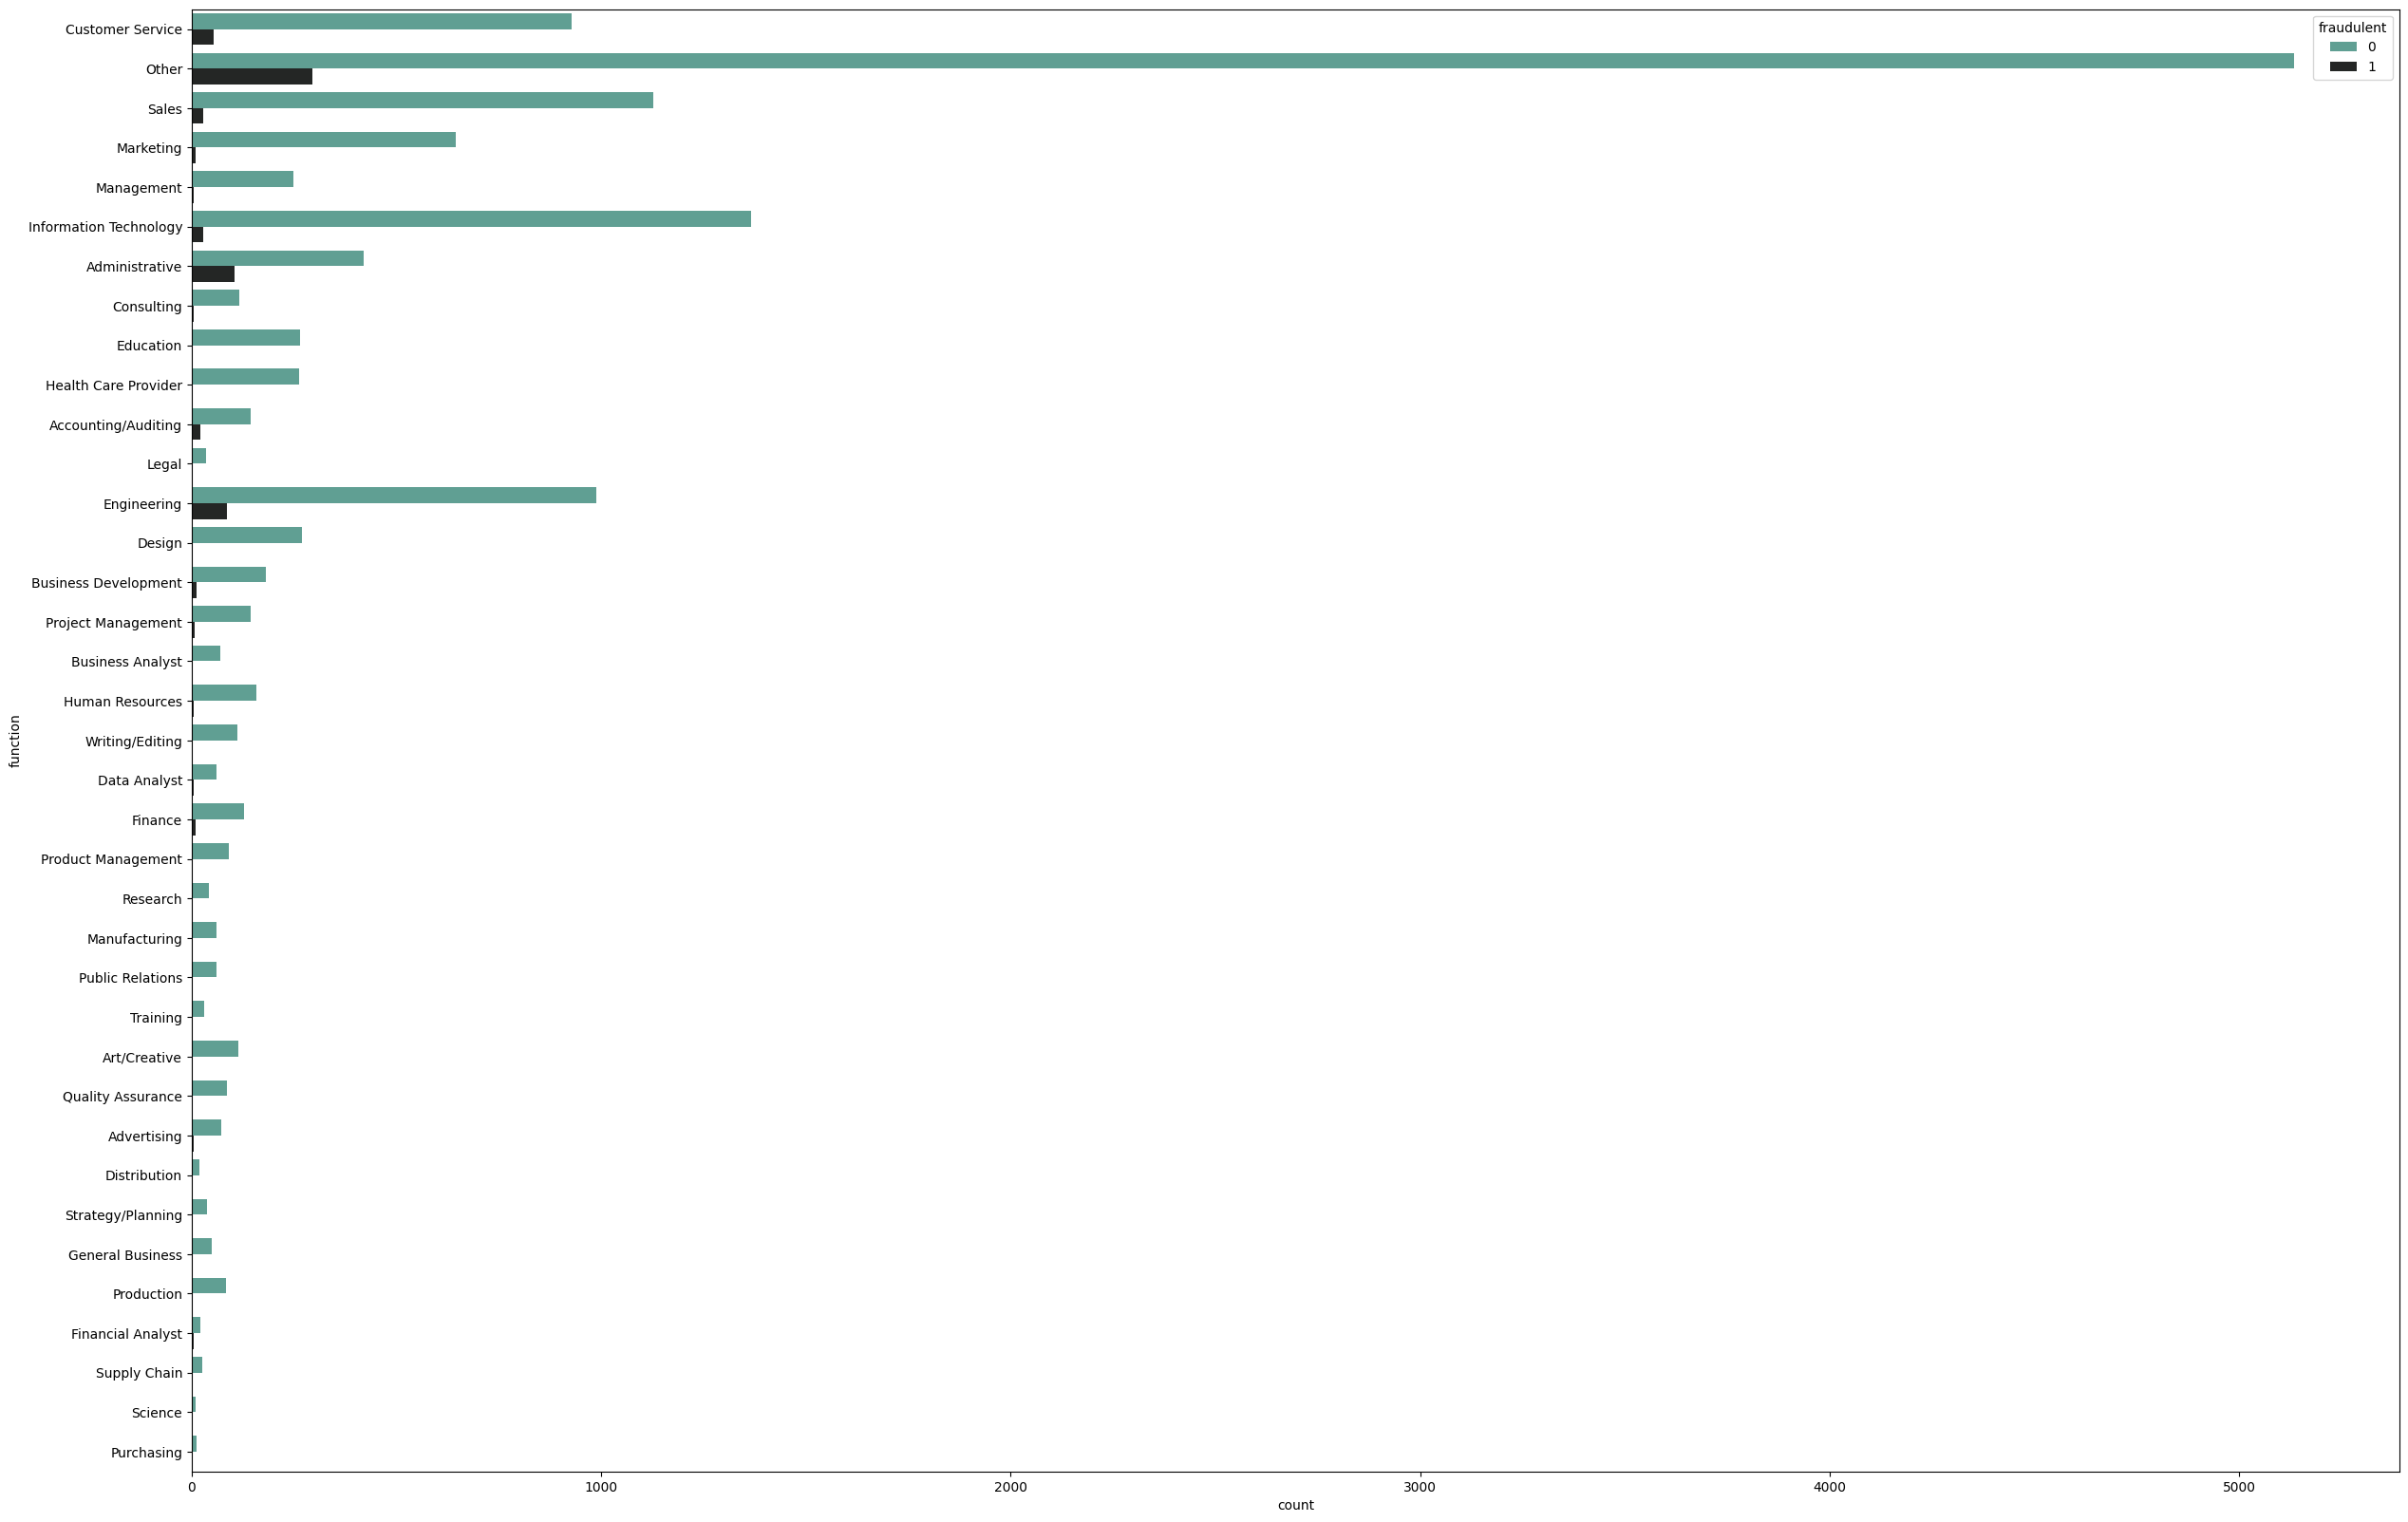

In [18]:
#Plotting incidence of fraud by the job function
plt.figure(figsize=(30,20))
sns.countplot(palette='dark:#5A9_r', hue='fraudulent', y='function',data=df)
plt.show()

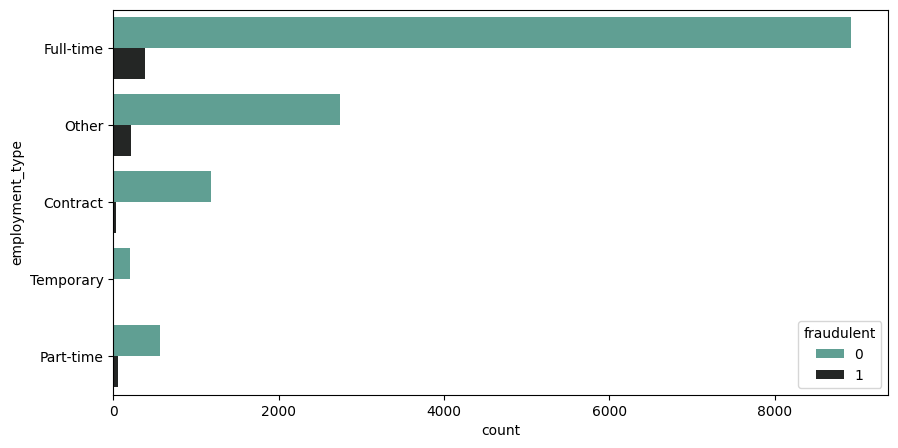

In [19]:
# Plotting incidence of fraud by employment type
plt.figure(figsize=(10,5))
sns.countplot(palette='dark:#5A9_r', hue='fraudulent', y='employment_type',data=df)
plt.show()

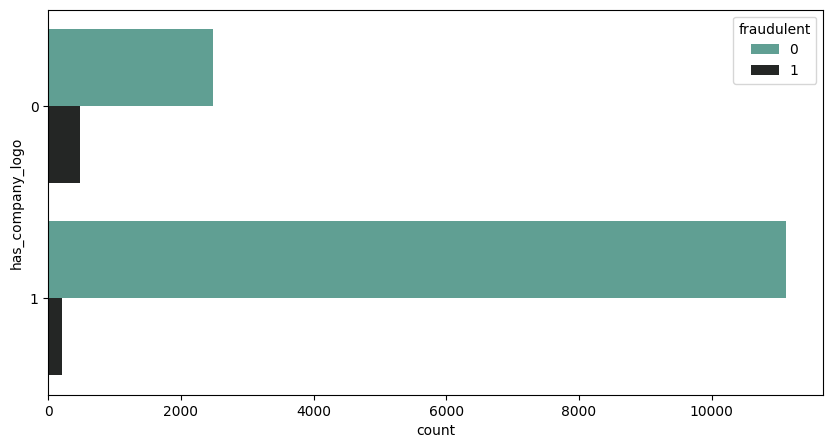

In [20]:
# Plotting incidence of fraud by company logo
plt.figure(figsize=(10,5))
sns.countplot(palette='dark:#5A9_r', hue='fraudulent', y='has_company_logo',data=df)
plt.show()


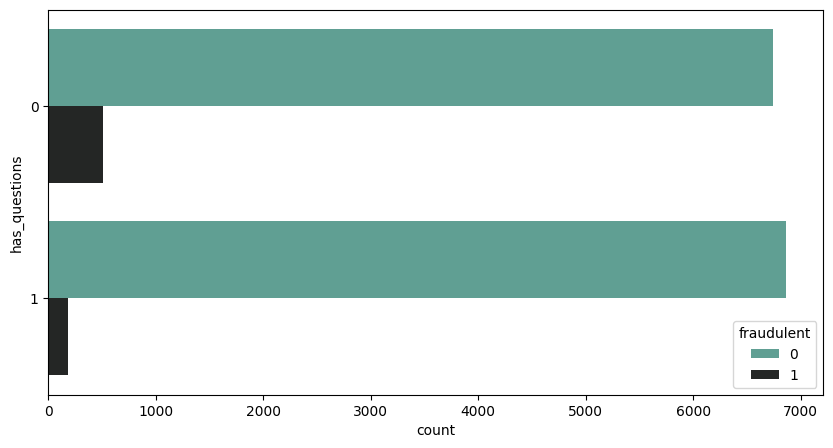

In [21]:
# Plotting incidence of fraud on basis of questions or no questions
plt.figure(figsize=(10,5))
sns.countplot(palette='dark:#5A9_r', hue='fraudulent', y='has_questions',data=df)
plt.show()

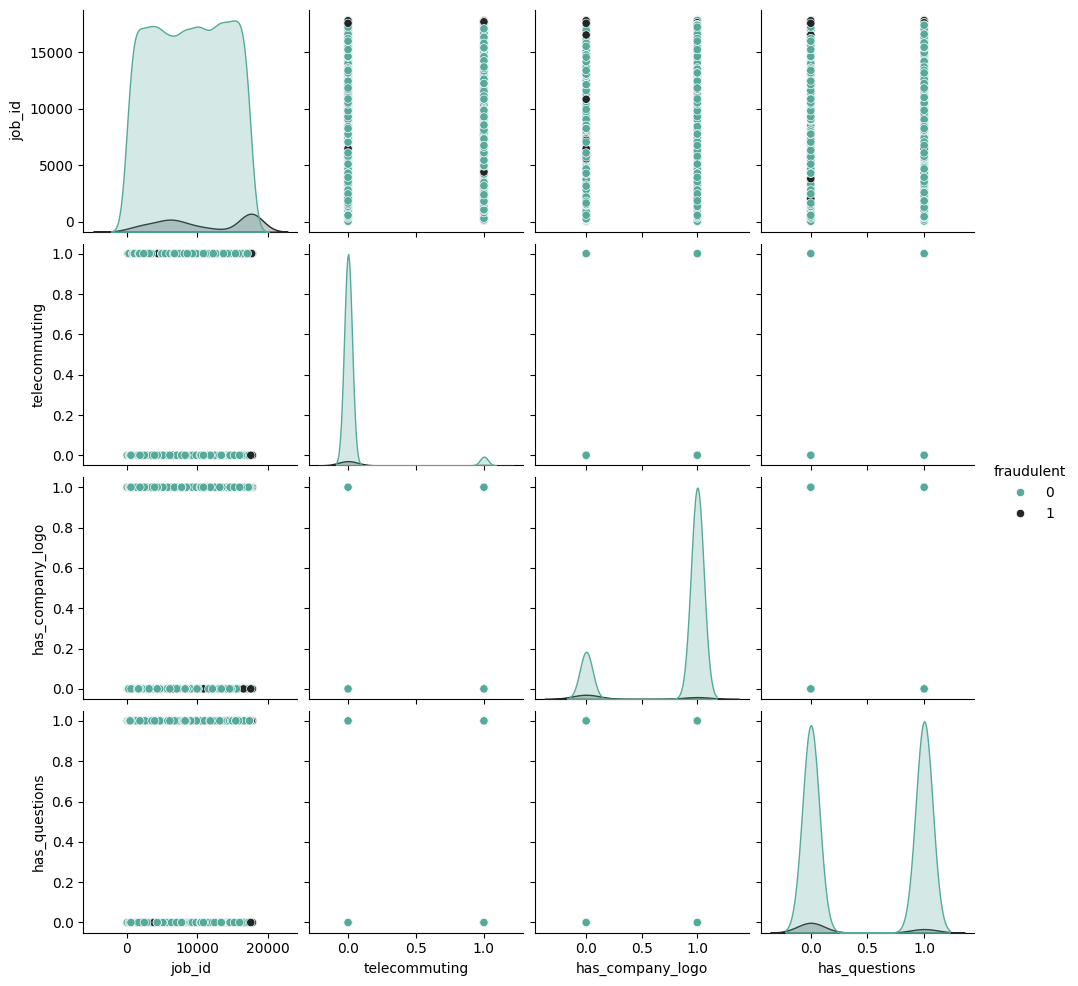

In [22]:
sns.pairplot(df,hue='fraudulent',palette='dark:#5A9_r',diag_kind='kde')
plt.show()

In [23]:
print('Correlation :- ')
df.corr(numeric_only=True)

Correlation :- 


,job_id,telecommuting,has_company_logo,has_questions,fraudulent
job_id,1.000000,-0.001187,-0.015192,-0.084235,0.087917
telecommuting,-0.001187,1.000000,-0.026645,0.015198,0.039421
has_company_logo,-0.015192,-0.026645,1.000000,0.244561,-0.269659
has_questions,-0.084235,0.015198,0.244561,1.000000,-0.103296
fraudulent,0.087917,0.039421,-0.269659,-0.103296,1.000000


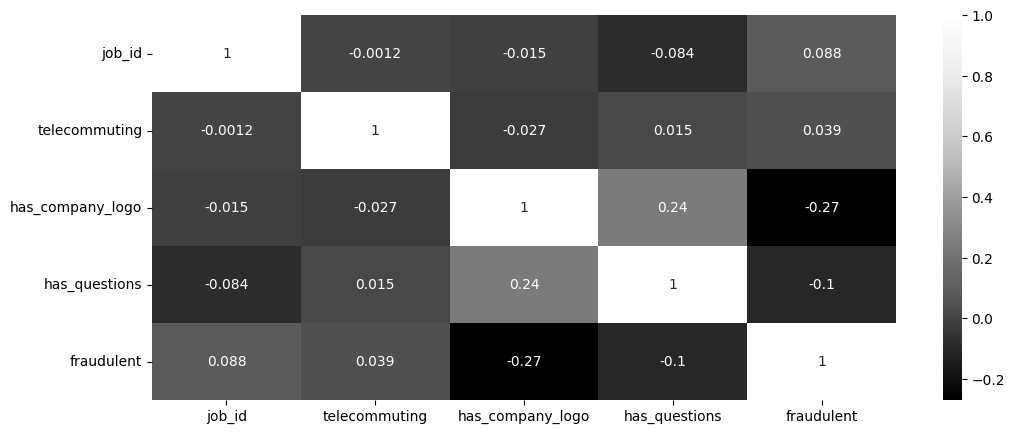

In [24]:
corr=df.corr(numeric_only=True)
plt.figure(figsize=(12,5))
sns.heatmap(corr,annot=True,cbar=True,cmap='Greys_r')
plt.show()

Machine Learning Model Training and Evaluation...


In [25]:
# Before attempting to convert categorical variables we're going to drop the free text columns that can't be converted...
# Also I am dropping the job id column since it's an id field that won't affect the model

# Print the current columns in the DataFrame to check for typos or missing columns
print("Current columns in DataFrame:")
print(df.columns)

# Now attempt to drop the columns. Double-check the column names against the printed list.
# Assuming a typo was found and corrected in the list below
df = df.drop(['job_id','company_profile','description','benefits','requirements'],axis=1,errors='ignore')
df1 = df1.drop(['job_id','company_profile','description','benefits','requirements'],axis=1,errors='ignore')
#I am using pd.get_dummies to convert the categorical attributes to boolean columns to be used in the models
#Get dummies will handle creation of the new columns representing possible categorical values as numerical 1/0

df = pd.get_dummies(df, prefix_sep = '_', drop_first=True)
df1 = pd.get_dummies(df1, prefix_sep = '_', drop_first=True)
print(df.shape)
print(df1.shape)

Current columns in DataFrame:
Index(['job_id', 'title', 'location', 'department', 'company_profile',
       'description', 'requirements', 'benefits', 'telecommuting',
       'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent', 'country'],
      dtype='object')
(14304, 13479)
(3576, 4905)


Logistic Regression ALgorithm...

In [26]:
def draw_cm(actual,predicted):
  cm=metrics.confusion_matrix(actual,predicted)
  sns.heatmap(cm,annot=True,fmt='.2f',xticklabels=['Yes','No'],yticklabels=['Yes','No'],cmap='Greys_r')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()



RandomForestClassifier took 72.86 seconds


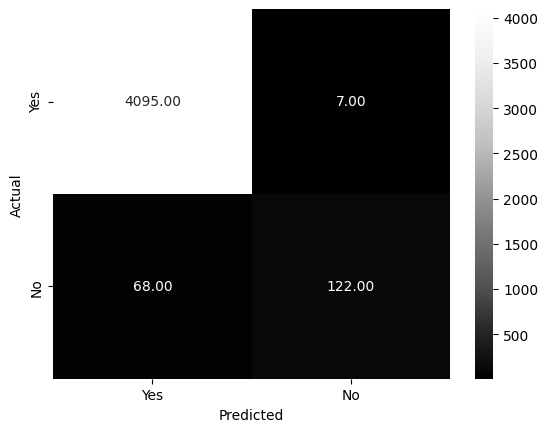

In [27]:
# Re-run the train_test_split and resampling cell
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score,accuracy_score,roc_curve
from sklearn.ensemble import RandomForestClassifier
from time import time

# Dropping class label from features X
X = df.drop('fraudulent',axis=1)

# Target class label assigned to y
y = df['fraudulent']

# 70/30 split of train/test data
# Re-executing this ensures y_test has the correct size corresponding to X_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=42)
# Apply resampling only to the training data
X_train_resampled,y_train_resampled=ros.fit_resample(X_train,y_train)

from imblearn.under_sampling import RandomUnderSampler
rus=RandomUnderSampler(random_state=42)
# Apply resampling only to the training data
X_train_resampled,y_train_resampled=rus.fit_resample(X_train_resampled,y_train_resampled)


# Now, re-execute the Random Forest training and prediction block

rfc = RandomForestClassifier(n_estimators=100,random_state=42)


start = time()
# Train on the resampled training data
rfc.fit(X_train_resampled,y_train_resampled)
print("RandomForestClassifier took %.2f seconds"
      % (time() - start,))

# Predict on the original test data
y_pred1 = rfc.predict(X_test)

# Remove the redundant fit call
# rfc.fit(X_train,y_train)

# Call draw_cm with the original y_test and the predictions on X_test
draw_cm(y_test,y_pred1)

In [28]:

logreg=LogisticRegression(class_weight={0: 1, 1: 30})
logreg.fit(X_train,y_train)

y_pred=logreg.predict(X_test)
print(y_pred)

[0 0 0 ... 0 1 0]


In [29]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      4102
           1       0.48      0.82      0.60       190

    accuracy                           0.95      4292
   macro avg       0.73      0.89      0.79      4292
weighted avg       0.97      0.95      0.96      4292



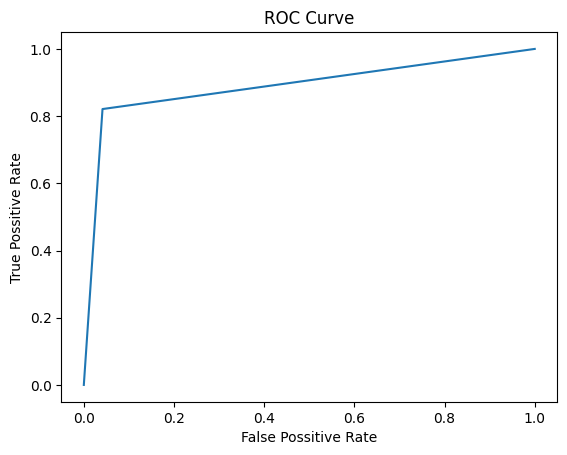

ROC_AUC_Score


np.float64(0.8898047165695808)

In [30]:
def ROC_Curve(Actual,Predicted):
  fpr,tpr,thresholds = roc_curve(Actual,Predicted)
  roc = plt.plot(fpr,tpr)
  plt.xlabel('False Possitive Rate')
  plt.ylabel('True Possitive Rate')
  plt.title('ROC Curve')
  plt.show()
  Threshold=thresholds
  return roc,thresholds

ROC_Curve(y_test,y_pred)
print('ROC_AUC_Score')
metrics.roc_auc_score(y_test,y_pred)

In [31]:
from sklearn import metrics

# Define result table
cols = ['Model', 'AUC Score', 'Precision Score', 'Recall Score', 'Accuracy Score', 'f1-score']
result_tabulation = pd.DataFrame(columns=cols)

# Add Logistic Regression results
Logistic_reg = pd.Series({
    'Model': "Logistic Regression",
    'AUC Score': metrics.roc_auc_score(y_test, y_pred),
    'Precision Score': metrics.precision_score(y_test, y_pred),
    'Recall Score': metrics.recall_score(y_test, y_pred),
    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
    'f1-score': metrics.f1_score(y_test, y_pred)
})

# Append using concat
result_tabulation = pd.concat([result_tabulation, Logistic_reg.to_frame().T], ignore_index=True)

# Display
print(result_tabulation)

                 Model AUC Score Precision Score Recall Score Accuracy Score  \
0  Logistic Regression  0.889805        0.478528     0.821053        0.95247   

   f1-score  
0  0.604651  


Random Forest Classifier Algorithm (Binary Classifier Algorithm)

RandomForestClassifier took 40.35 seconds


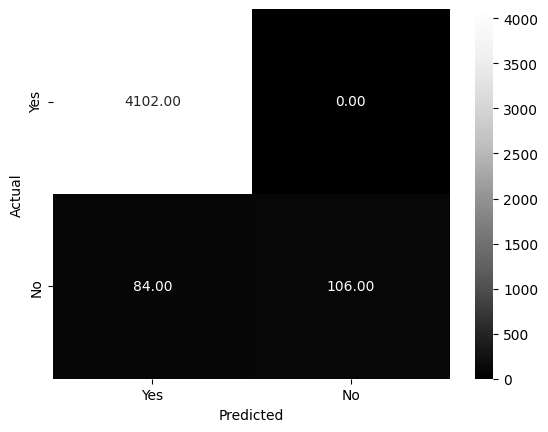

In [32]:
rfc = RandomForestClassifier(n_estimators=100,random_state=42)


start = time()
rfc.fit(X_train,y_train)
print("RandomForestClassifier took %.2f seconds"
      % (time() - start,))

y_pred1 = rfc.predict(X_test)


rfc.fit(X_train,y_train)

draw_cm(y_test,y_pred1)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4102
           1       1.00      0.56      0.72       190

    accuracy                           0.98      4292
   macro avg       0.99      0.78      0.85      4292
weighted avg       0.98      0.98      0.98      4292



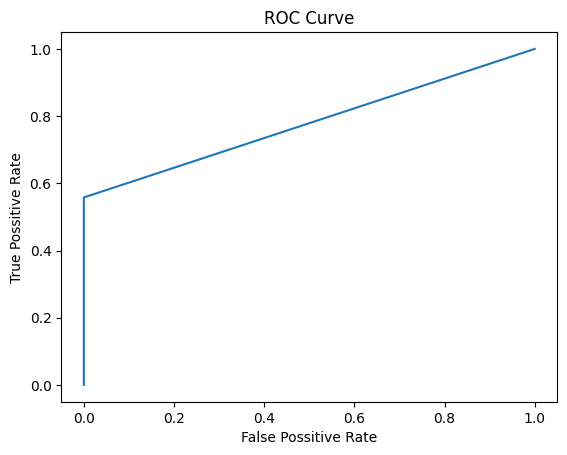

([<matplotlib.lines.Line2D at 0x7a01be34a6d0>], array([inf,  1.,  0.]))

In [33]:
print(metrics.classification_report(y_test,y_pred1))

ROC_Curve(y_test,y_pred1)



In [34]:
metrics.roc_auc_score(y_test,y_pred1)

np.float64(0.7789473684210526)

In [35]:
Random_Forest = pd.Series({'Model': "Random Forest",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred1),
                 'Precision Score': metrics.precision_score(y_test, y_pred1),
                 'Recall Score': metrics.recall_score(y_test, y_pred1),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred1),
                 'f1-score':metrics.f1_score(y_test, y_pred1)})

result_tabulation = pd.concat([result_tabulation, Random_Forest.to_frame().T], ignore_index=True)
print(result_tabulation)

                 Model AUC Score Precision Score Recall Score Accuracy Score  \
0  Logistic Regression  0.889805        0.478528     0.821053        0.95247   
1        Random Forest  0.778947             1.0     0.557895       0.980429   

   f1-score  
0  0.604651  
1  0.716216  


In [36]:
print(metrics.classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4102
           1       1.00      0.56      0.72       190

    accuracy                           0.98      4292
   macro avg       0.99      0.78      0.85      4292
weighted avg       0.98      0.98      0.98      4292



In [37]:
# This block is for making predictions on the *submission* test data (df1)
X_test_submission = df1 # Use a different variable name to avoid confusion
X_test_submission, _ = X_test_submission.align(X_train, join='right', axis=1, fill_value=0)
y_test_pred_submission = rfc.predict(X_test_submission)
pd.DataFrame({'Prediction': y_test_pred_submission}).to_csv("test_predictions1.csv", index=False)

**KNN**

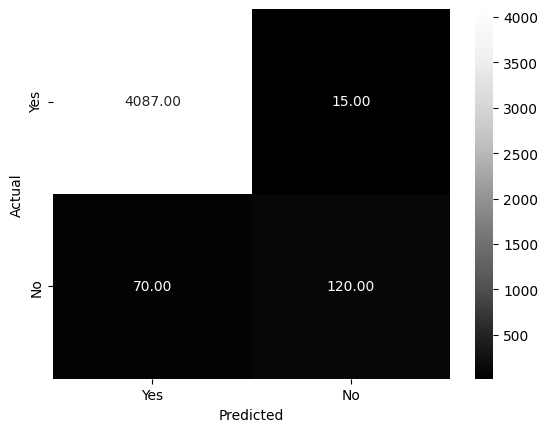

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)

start=time()
knn.fit(X_train,y_train)

y_pred_knn = knn.predict(X_test)

draw_cm(y_test,y_pred_knn)

In [39]:
accuracy_score(y_test,y_pred_knn)

0.9801957129543336

In [40]:
print("KNeighborsClassifier took %.2f seconds"
      % (time() - start,))
print(f"Accuracy: {round(knn.score(X_test, y_test)*100)}%")

KNeighborsClassifier took 48.89 seconds
Accuracy: 98%


In [41]:
K_Nearest_Neighbours = pd.Series({'Model': "KNN",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred_knn),
                 'Precision Score': metrics.precision_score(y_test, y_pred_knn),
                 'Recall Score': metrics.recall_score(y_test, y_pred_knn),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_knn),
                 'f1-score':metrics.f1_score(y_test, y_pred_knn)})

result_tabulation = pd.concat([result_tabulation, pd.DataFrame([K_Nearest_Neighbours])], ignore_index=True)

result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.889805,0.478528,0.821053,0.95247,0.604651
1,Random Forest,0.778947,1.0,0.557895,0.980429,0.716216
2,KNN,0.813961,0.888889,0.631579,0.980196,0.738462


In [42]:
#from sklearn.svm import SVC
#from sklearn.metrics import classification_report

#svm = SVC(kernel='rbf', class_weight='balanced', probability=True)
#svm.fit(X_train, y_train)
#y_pred_svm = svm.predict(X_test)
#classification_report(y_test, y_pred_svm)

In [43]:
#accuracy_score(y_test,y_pred_svm)

In [44]:
# SVM = pd.Series({'Model': "svm_rbf",
#                      'AUC Score' : metrics.roc_auc_score(y_test, y_pred_svm),
#                  'Precision Score': metrics.precision_score(y_test, y_pred_svm),
#                  'Recall Score': metrics.recall_score(y_test, y_pred_svm),
#                  'Accuracy Score': metrics.accuracy_score(y_test, y_pred_svm),
#                  'f1-score':metrics.f1_score(y_test, y_pred_svm)})

# result_tabulation = pd.concat([result_tabulation, pd.DataFrame([SVM])], ignore_index=True)

# result_tabulation

In [45]:
!pip install joblib==1.3.2

In [48]:
import joblib

# Save the Random Forest model
filename_rf = 'random_forest_model.joblib'
joblib.dump(rfc, filename_rf)

# Save the KNN model
filename_knn = 'knn_model.joblib'
joblib.dump(knn, filename_knn)

print(f"Random Forest model saved as {filename_rf}")
print(f"KNN model saved as {filename_knn}")

Random Forest model saved as random_forest_model.joblib
KNN model saved as knn_model.joblib
